<a href="https://colab.research.google.com/github/pmdino/CS39AA-Project/blob/main/CS39AA_Project_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir mydata
!cp -r /content/drive/MyDrive/data/trainnews.csv /content/mydata

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

news_data = pd.read_csv("./mydata/trainnews.csv")
news_data.head()
news_data = news_data.fillna('')

news_data['content'] = news_data['author'] + news_data['text'] + news_data['title']
X = news_data['content'].copy()
y = news_data['label'].copy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss

tune_model = True # can change this to False once you've chosen a hyperparam value and before Saving your notebook with Kaggle

# A function to create and fit a RF with a specific number of trees
def tuneModel(hyperparam_value):
    rf_model = RandomForestClassifier(n_estimators=hyperparam_value, random_state=5)
    rf_model.fit(X_train, y_train)
    y_train_pred_prob = rf_model.predict_proba(X_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred_prob = rf_model.predict_proba(X_val)
    y_val_pred = rf_model.predict(X_val)
    train_loss = log_loss(y_train, y_train_pred_prob, labels=['reliable', 'unreliable'])
    train_acc = accuracy_score(y_train, y_train_pred)
    val_loss = log_loss(y_val, y_val_pred_prob, labels=['reliable', 'unreliable'])
    val_acc = accuracy_score(y_val, y_val_pred)
    return (train_loss, val_loss, train_acc, val_acc)


hyp_param_vals = list(range(10,261,50)) # good values for n_estimators

metrics = []

if tune_model:
    for hp in hyp_param_vals:
        metrics.append(tuneModel(hp))

/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar inst

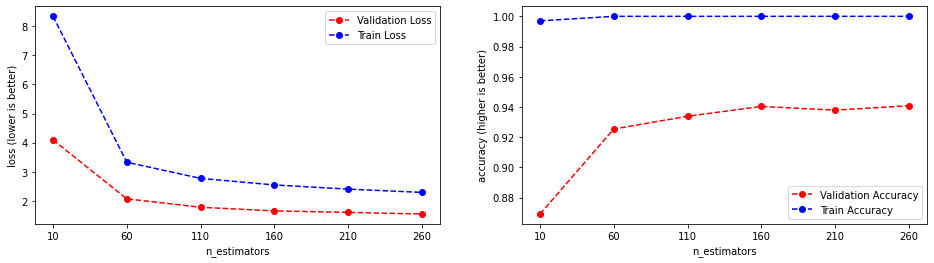

In [4]:
import matplotlib.pyplot as plt

if tune_model:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

    ax1.set_xticks(hyp_param_vals)
    ax1.set(xlabel="n_estimators", ylabel="loss (lower is better)")
    ax1.plot(hyp_param_vals, [metric[1] for metric in metrics], '--ro') # validation loss
    ax1.plot(hyp_param_vals, [metric[0] for metric in metrics], '--bo') # training loss
    ax1.legend(["Validation Loss", "Train Loss"], loc=1)

    ax2.set_xticks(hyp_param_vals)
    ax2.set(xlabel="n_estimators", ylabel="accuracy (higher is better)")
    ax2.plot(hyp_param_vals, [metric[3] for metric in metrics], '--ro') # validation accuracy
    ax2.plot(hyp_param_vals, [metric[2] for metric in metrics], '--bo') # training accuracy
    ax2.legend(["Validation Accuracy", "Train Accuracy"], loc=4)

In [5]:
if tune_model:
    tuning_results = np.array([hyp_param_vals, [round(metric[1],2) for metric in metrics], [round(metric[3],2) for metric in metrics]])
    print(tuning_results)

[[ 10.    60.   110.   160.   210.   260.  ]
 [  4.1    2.07   1.78   1.66   1.61   1.55]
 [  0.87   0.93   0.93   0.94   0.94   0.94]]


accuracy (on X_train): 0.9970
accuracy (on X_val): 0.8692


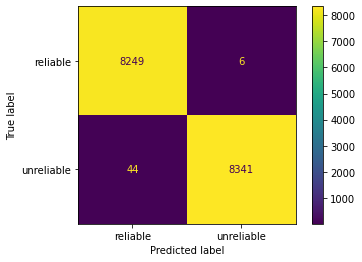

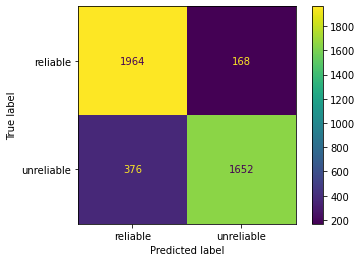

In [6]:
model = RandomForestClassifier(n_estimators=10, random_state=5)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['reliable', 'unreliable'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['reliable', 'unreliable'])
disp.plot()
print(f"accuracy (on X_val): {accuracy_score(y_val, predictions_val):.4f}")